In [1]:
import pandas as pd
import numpy as np

In [2]:
data= pd.read_csv('data_324.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
data.head()

,isca,caid,Vin,Year,Make,Model,Trim,Mileage,Date,MIDMapAlgorithm,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Velocity,Salesefficiency,AvgDaysToSell,vol_tier,availability,inventory,spread_current,buyer_how_paid_cd,floorplan_cur_cust_nm,floorplan_cust_ovc_id,NGC_purchase_price,NGC_floored_amount,wholesale_price,MMR_price,list_price,price,cost,revenue,profit,profitability,NGC_total_floored,wallet_share,count_vin,count_vin_for_wallet_share,count_vin_floored,count_vin_floored_by_NGC
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,Sierra 1500,Truck,NaN,2019-10-30,Exact,11750.0,16600.0,13051.0,116676.0,Warm,0.494258,15.0,Tier3,Medium,61.0,4850.0,NaN,NaN,NaN,NaN,NaN,NaN,11750.0,NaN,16600.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,Civic,Other,NaN,2019-10-12,Exact,10150.0,13900.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,3750.0,NaN,NaN,NaN,NaN,NaN,NaN,10150.0,NaN,13900.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,Sonata,Sedan,19310.0,2019-10-20,Exact,16000.0,17550.0,11112.0,44270.0,Cold,0.693079,21.0,Tier1,Low,502.0,1550.0,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,17550.0,37900.0,48050.0,10150.0,0.211238,0.0,0.0,3,3.0,0.0,0.0
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,Civic,LX,79889.0,2019-08-21,Exact,4225.0,7225.0,3671.0,127175.0,Hot,0.731679,12.0,Tier3,Low,51.0,3000.0,Check,NaN,NaN,NaN,NaN,5700.0,5700.0,NaN,7225.0,5903300.0,6464402.0,561102.0,0.086799,0.0,0.0,242,212.0,0.0,0.0
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,Civic,LX,80827.0,2019-08-21,Exact,7075.0,9950.0,7138.0,92944.0,Hot,0.685657,19.0,Tier2,Medium,140.0,2875.0,Check,NaN,NaN,NaN,NaN,7600.0,7600.0,NaN,9950.0,5903300.0,6464402.0,561102.0,0.086799,0.0,0.0,242,212.0,0.0,0.0


In [4]:
data.columns

Index(['isca', 'caid', 'Vin', 'Year', 'Make', 'Model', 'Trim', 'Mileage',
       'Date', 'MIDMapAlgorithm', 'MMR_adj_current', 'RMI_adj_current',
       'AvgPrice', 'avgmiles', 'Velocity', 'Salesefficiency', 'AvgDaysToSell',
       'vol_tier', 'availability', 'inventory', 'spread_current',
       'buyer_how_paid_cd', 'floorplan_cur_cust_nm', 'floorplan_cust_ovc_id',
       'NGC_purchase_price', 'NGC_floored_amount', 'wholesale_price',
       'MMR_price', 'list_price', 'price', 'cost', 'revenue', 'profit',
       'profitability', 'NGC_total_floored', 'wallet_share', 'count_vin',
       'count_vin_for_wallet_share', 'count_vin_floored',
       'count_vin_floored_by_NGC'],
      dtype='object')

In [5]:
data=data.loc[:,['isca','caid', 'Vin', 'Year', 'Make', 'Mileage','MMR_adj_current', 'RMI_adj_current','AvgPrice', 'avgmiles', 'Velocity', 'Salesefficiency', 'AvgDaysToSell',
       'vol_tier', 'availability', 'inventory', 'NGC_floored_amount', 'list_price','wholesale_price', 'MMR_price', 'revenue', 'cost', 'profitability','profit','NGC_total_floored','wallet_share','count_vin']]

In [6]:
data=pd.get_dummies(data=data, columns=['Velocity','vol_tier','availability'])

In [8]:
data['avg_year'] = data.groupby(['caid'])['Year'].transform(np.mean)
data['make_count'] = data.groupby(['caid'])['Make'].transform('nunique')
data['avg_milage'] = data.groupby(['caid'])['Mileage'].transform(np.mean)

In [9]:
data['avgmiles'] = data.groupby(['caid'])['avgmiles'].transform(np.mean)
data['AvgPrice'] = data.groupby(['caid'])['AvgPrice'].transform(np.mean)

In [10]:
data['Salesefficiency'] = data.groupby(['caid'])['Salesefficiency'].transform(np.mean)
data['AvgDaysToSell'] = data.groupby(['caid'])['AvgDaysToSell'].transform(np.mean)
data['inventory'] = data.groupby(['caid'])['inventory'].transform(np.mean)

In [11]:
data['MMR_adj_current'] = data.groupby(['caid'])['MMR_adj_current'].transform(np.mean)
data['RMI_adj_current'] = data.groupby(['caid'])['RMI_adj_current'].transform(np.mean)

In [12]:
data['list_price'] = data.groupby(['caid'])['list_price'].transform(np.mean)
data['MMR_price'] = data.groupby(['caid'])['MMR_price'].transform(np.mean)

In [13]:
data['wholesale_price'] = data.groupby(['caid'])['wholesale_price'].transform(np.mean)

In [14]:
data['NGC_floored_amount'] = data.groupby(['caid'])['NGC_floored_amount'].transform(np.mean)

In [15]:
data['revenue'] = data.groupby(['caid'])['revenue'].transform(np.mean)

In [16]:
data['cost'] = data.groupby(['caid'])['cost'].transform(np.mean)
data['profitability'] = data.groupby(['caid'])['profitability'].transform(np.mean)

In [17]:
data['profitability'] = data.groupby(['caid'])['profitability'].transform(np.mean)

In [60]:
data['wallet_share'].shape

(20321809,)

In [61]:
data[data.wallet_share !=0].shape

(649911, 42)

In [18]:
##category
data['Velocity_Cold'] = data.groupby(['caid'])['Velocity_Cold'].transform(np.sum)
data['Velocity_Hot'] = data.groupby(['caid'])['Velocity_Hot'].transform(np.sum)
data['Velocity_Warm'] = data.groupby(['caid'])['Velocity_Warm'].transform(np.sum)
data['vol_tier_Tier1'] = data.groupby(['caid'])['vol_tier_Tier1'].transform(np.sum)
data['vol_tier_Tier2'] = data.groupby(['caid'])['vol_tier_Tier2'].transform(np.sum)
data['vol_tier_Tier3'] = data.groupby(['caid'])['vol_tier_Tier3'].transform(np.sum)
data['vol_tier_Tier4'] = data.groupby(['caid'])['vol_tier_Tier4'].transform(np.sum)
data['vol_tier_Tier5'] = data.groupby(['caid'])['vol_tier_Tier5'].transform(np.sum)
data['availability_Excessive'] = data.groupby(['caid'])['availability_Excessive'].transform(np.sum)
data['availability_High'] = data.groupby(['caid'])['availability_High'].transform(np.sum)
data['availability_Low'] = data.groupby(['caid'])['availability_Low'].transform(np.sum)
data['availability_Medium'] = data.groupby(['caid'])['availability_Medium'].transform(np.sum)
data['availability_No Inventory'] = data.groupby(['caid'])['availability_No Inventory'].transform(np.sum)
data['availability_Other'] = data.groupby(['caid'])['availability_Other'].transform(np.sum)

In [19]:
data.head()

,isca,caid,Vin,Year,Make,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,...,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
0,1,CA11197380,1GTR2VE7XCZ218323,2012,GMC,NaN,12633.333333,16016.666667,10433.666667,84630.000000,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
1,1,CA11197380,2HGFB6E50DH705377,2013,Honda,NaN,12633.333333,16016.666667,10433.666667,84630.000000,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,19310.0,12633.333333,16016.666667,10433.666667,84630.000000,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
3,1,CA11197386,19XFA1F59AE046628,2010,Honda,79889.0,26992.723005,31022.123894,29009.302128,33553.957447,...,26.0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
4,1,CA11197386,19XFB2F55DE031146,2013,Honda,80827.0,26992.723005,31022.123894,29009.302128,33553.957447,...,26.0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084


In [20]:
data=data.drop_duplicates(['caid'],keep= 'last')

In [21]:
data.head()

,isca,caid,Vin,Year,Make,Mileage,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,...,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
2,1,CA11197380,5NPE34AF5GH274704,2016,Hyundai,19310.0,12633.333333,16016.666667,10433.666667,84630.000000,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
244,1,CA11197386,ZACCJBCT4FPB27624,2015,Jeep,NaN,26992.723005,31022.123894,29009.302128,33553.957447,...,26.0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
575,1,CA11197387,WP1AG2A52HLB50755,2017,Porsche,23265.0,45102.591991,57539.038340,56054.082781,26070.062914,...,137.0,5.0,108.0,43.0,136.0,3.0,7.0,2016.752266,21,21148.860669
646,1,CA11197388,YV1SW592X61534208,2006,Volvo,171647.0,3498.550725,6719.339623,4206.478873,128543.450704,...,17.0,0.0,4.0,17.0,49.0,1.0,0.0,2008.422535,25,133246.704225
648,1,CA11197391,4T1B11HK4JU069300,2018,Toyota,39616.0,8850.000000,19400.000000,9144.500000,88761.500000,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2011.500000,2,101540.000000


In [22]:
data['profitability'] = data['profit'] / data['revenue']

In [23]:
data = data.drop(['caid','Vin','Year','Make','Mileage','list_price','wholesale_price','cost','profit','NGC_floored_amount','MMR_price'],axis=1)

In [24]:
data.head()

,isca,MMR_adj_current,RMI_adj_current,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,...,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,avg_milage
2,1,12633.333333,16016.666667,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2013.666667,3,19310.000000
244,1,26992.723005,31022.123894,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,...,26.0,105.0,43.0,13.0,57.0,0.0,17.0,2017.619835,15,24672.820084
575,1,45102.591991,57539.038340,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,...,137.0,5.0,108.0,43.0,136.0,3.0,7.0,2016.752266,21,21148.860669
646,1,3498.550725,6719.339623,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,...,17.0,0.0,4.0,17.0,49.0,1.0,0.0,2008.422535,25,133246.704225
648,1,8850.000000,19400.000000,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2011.500000,2,101540.000000


In [25]:
data['Wholesale_dif'] = (data['MMR_adj_current'] - data['AvgPrice']) / data['AvgPrice']
data['Retail_dif'] = (data['RMI_adj_current'] - data['AvgPrice']) / data['AvgPrice']
data['Avg_mileage_dif'] = (data['avg_milage'] - data['avgmiles']) / data['avgmiles']
data['Velocity_Cold'] = data['Velocity_Cold'] / data['count_vin']
data['Velocity_Hot'] = data['Velocity_Hot'] / data['count_vin']
data['Velocity_Warm'] = data['Velocity_Warm'] / data['count_vin']
data['vol_tier_Tier1'] = data['vol_tier_Tier1'] / data['count_vin']
data['vol_tier_Tier2'] = data['vol_tier_Tier2'] / data['count_vin']
data['vol_tier_Tier3'] = data['vol_tier_Tier3'] / data['count_vin']
data['vol_tier_Tier4'] = data['vol_tier_Tier4'] / data['count_vin']
data['vol_tier_Tier5'] = data['vol_tier_Tier5'] / data['count_vin']
data['availability_Excessive'] = data['availability_Excessive'] / data['count_vin']
data['availability_High'] = data['availability_High'] / data['count_vin']
data['availability_Low'] = data['availability_Low'] / data['count_vin']
data['availability_Medium'] = data['availability_Medium'] / data['count_vin']
data['availability_No Inventory'] = data['availability_No Inventory'] / data['count_vin']
data['availability_Other'] = data['availability_Other'] / data['count_vin']
data['avg_year'] = data['avg_year'] - 1933

In [27]:
data = data.drop(['MMR_adj_current','RMI_adj_current','avg_milage'],axis=1)

In [28]:
data.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,...,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
2,1,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,...,0.000000,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
244,1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,...,0.177686,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
575,1,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,...,0.326284,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
646,1,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,...,0.056338,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
648,1,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,...,0.500000,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [29]:
data.describe()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,...,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
count,109873.000000,108706.000000,108706.000000,108706.000000,108706.000000,108583.000000,1.098730e+05,1.059310e+05,1.098730e+05,106119.000000,...,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,109873.000000,107542.000000,105798.000000,105078.000000
mean,0.567792,16903.288893,72191.879259,0.560649,19.799829,266.869034,4.109637e+06,-inf,1.526757e+04,0.047258,...,0.196125,0.164817,0.429801,0.005172,0.038977,80.711894,9.934270,-0.073576,0.292164,-0.164116
std,0.495385,13651.697789,48796.558435,0.086019,11.368521,277.056405,2.349592e+07,NaN,2.976076e+05,0.191720,...,0.227159,0.213686,0.326883,0.040647,0.097630,4.739997,10.197333,0.174701,0.332843,0.569475
min,0.000000,267.000000,27.000000,0.000000,1.000000,1.000000,0.000000e+00,-inf,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.984648,-0.936874,-1.000000
25%,0.000000,6706.000000,29308.187657,0.512500,14.666667,77.142857,3.960000e+04,1.238825e-01,0.000000e+00,0.000000,...,0.000000,0.000000,0.131579,0.000000,0.000000,77.250000,2.000000,-0.146782,0.116328,-0.349326
50%,1.000000,15668.901408,60452.859307,0.570562,17.800000,189.555556,2.537750e+05,1.674990e-01,0.000000e+00,0.000000,...,0.133333,0.100000,0.406250,0.000000,0.000000,82.000000,6.000000,-0.055312,0.195459,-0.123874
75%,1.000000,23406.312500,116750.812500,0.616074,20.615385,362.607692,2.816280e+06,3.192112e-01,0.000000e+00,0.000000,...,0.300000,0.233533,0.680000,0.000000,0.021978,84.644068,16.000000,0.009324,0.370119,0.063674
max,1.000000,273038.000000,995626.000000,1.000000,283.000000,5798.000000,4.345525e+09,9.999436e-01,7.988542e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,65.000000,6.492795,7.107905,75.163754


In [30]:
data.isna().sum()

isca                            0
AvgPrice                     1167
avgmiles                     1167
Salesefficiency              1167
AvgDaysToSell                1167
inventory                    1290
revenue                         0
profitability                3942
NGC_total_floored               0
wallet_share                 3754
count_vin                       0
Velocity_Cold                   0
Velocity_Hot                    0
Velocity_Warm                   0
vol_tier_Tier1                  0
vol_tier_Tier2                  0
vol_tier_Tier3                  0
vol_tier_Tier4                  0
vol_tier_Tier5                  0
availability_Excessive          0
availability_High               0
availability_Low                0
availability_Medium             0
availability_No Inventory       0
availability_Other              0
avg_year                        0
make_count                      0
Wholesale_dif                2331
Retail_dif                   4075
Avg_mileage_di

In [31]:
data = data[data.count_vin.notnull()]

In [32]:
data.shape

(109873, 30)

In [33]:
data.to_csv('0407KMEANS_data.csv')

## Mixed Approach

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('0407KMEANS_data.csv')

In [3]:
df.columns

Index(['Unnamed: 0', 'isca', 'AvgPrice', 'avgmiles', 'Salesefficiency',
       'AvgDaysToSell', 'inventory', 'revenue', 'profitability',
       'NGC_total_floored', 'wallet_share', 'count_vin', 'Velocity_Cold',
       'Velocity_Hot', 'Velocity_Warm', 'vol_tier_Tier1', 'vol_tier_Tier2',
       'vol_tier_Tier3', 'vol_tier_Tier4', 'vol_tier_Tier5',
       'availability_Excessive', 'availability_High', 'availability_Low',
       'availability_Medium', 'availability_No Inventory',
       'availability_Other', 'avg_year', 'make_count', 'Wholesale_dif',
       'Retail_dif', 'Avg_mileage_dif'],
      dtype='object')

In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.shape

(109873, 30)

In [6]:
df1 = df.dropna()

In [7]:
df1.shape

(102114, 30)

In [8]:
#define X and Y
x = df1.values

In [9]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df1)
mm_scaler.transform(x)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[ 1.00000000e+00, -2.65619719e-03, -3.71888463e-04, ...,
         2.12114883e-01,  1.39201559e-01,  1.31689384e-02],
       [ 1.00000000e+00, -2.65584144e-03, -3.72048780e-04, ...,
         2.02975543e-01,  1.32005632e-01,  1.32563639e-02],
       [ 1.00000000e+00, -2.65532349e-03, -3.72072270e-04, ...,
         1.98872417e-01,  1.31342855e-01,  1.32694504e-02],
       ...,
       [ 0.00000000e+00, -2.65633012e-03, -3.71781847e-04, ...,
         2.07407116e-01,  1.43350490e-01,  1.33058885e-02],
       [ 0.00000000e+00, -2.65630940e-03, -3.71746072e-04, ...,
         1.91168127e-01,  1.30258044e-01,  1.33803880e-02],
       [ 0.00000000e+00, -2.65636724e-03, -3.71736220e-04, ...,
         2.11439041e-01,  1.56359729e-01,  1.32329151e-02]])

2
3
4
5
6
7
8
9
10
11
12
13
14


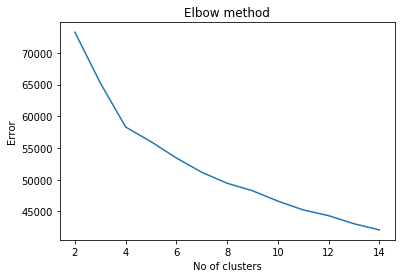

In [11]:
Error =[]
for i in range(2, 15):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,15):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)

2
3
4
5
6
7
8
9
10
11
12
13
14


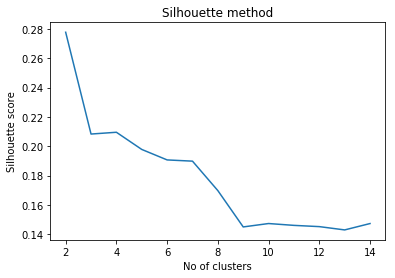

In [13]:
plt.plot(range(2, 15), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [14]:
kmeansk = KMeans(n_clusters=4)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[1 3 1 ... 2 2 2]


array([[ 6.17284002e-14,  1.13710721e-01,  4.75277230e-02,
         5.46276835e-01,  8.19579694e-02,  7.14434035e-02,
         1.13457473e-03,  9.44924118e-01,  1.29291109e-17,
         1.92207361e-14,  9.69259512e-04,  3.62954965e-01,
         2.33714235e-01,  3.40885524e-01,  2.70430348e-01,
         1.43473126e-01,  2.05742996e-01,  1.20035630e-01,
         2.17468615e-01,  3.01380693e-01,  3.52881388e-01,
         8.54978047e-02,  1.33879562e-01,  2.90509223e-03,
         8.13324220e-02,  9.53099243e-01,  9.65406852e-02,
         1.69539397e-01,  1.35594747e-01,  7.24998560e-03],
       [ 1.00000000e+00,  3.37726445e-02,  1.99265394e-01,
         6.36087474e-01,  5.38453313e-02,  2.43380430e-02,
         1.33646106e-04,  9.57410843e-01,  4.13309864e-04,
         1.34338584e-01,  2.03708711e-04,  1.03486412e-01,
         5.49024560e-01,  3.27656004e-01,  1.70706124e-01,
         1.98782400e-01,  2.90778570e-01,  1.59684327e-01,
         1.65777283e-01,  6.67287076e-03,  6.81394441e-

In [15]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[ 0. ,  0.1,  0. ,  0.5,  0.1,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,
         0.4,  0.2,  0.3,  0.3,  0.1,  0.2,  0.1,  0.2,  0.3,  0.4,  0.1,
         0.1,  0. ,  0.1,  1. ,  0.1,  0.2,  0.1,  0. ],
       [ 1. ,  0. ,  0.2,  0.6,  0.1,  0. ,  0. ,  1. ,  0. ,  0.1,  0. ,
         0.1,  0.5,  0.3,  0.2,  0.2,  0.3,  0.2,  0.2,  0. ,  0.1,  0.2,
         0.7,  0. ,  0. ,  0.8,  0.1,  0.2,  0.2,  0. ],
       [ 0. ,  0. ,  0.2,  0.6,  0.1,  0. ,  0. ,  1. , -0. ,  0. ,  0. ,
         0.1,  0.5,  0.3,  0.2,  0.2,  0.3,  0.2,  0.2,  0. ,  0.1,  0.2,
         0.7,  0. ,  0. ,  0.8,  0.1,  0.2,  0.2,  0. ],
       [ 1. ,  0.1,  0.1,  0.6,  0.1,  0.1,  0. ,  0.9,  0. ,  0. ,  0. ,
         0.3,  0.3,  0.3,  0.3,  0.2,  0.2,  0.1,  0.2,  0.2,  0.3,  0.1,
         0.2,  0. ,  0.1,  0.9,  0.2,  0.2,  0.1,  0. ]])

In [16]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({1: 30122, 3: 29109, 2: 23052, 0: 19831})

In [17]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))

In [18]:
result.columns = df1.columns

In [19]:
result

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,...,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,0.0,0.114,0.048,0.546,0.082,0.071,0.001,0.945,0.0,0.000,...,0.353,0.085,0.134,0.003,0.081,0.953,0.097,0.170,0.136,0.007
1,1.0,0.034,0.199,0.636,0.054,0.024,0.000,0.957,0.0,0.134,...,0.068,0.206,0.698,0.008,0.001,0.794,0.125,0.150,0.168,0.013
2,0.0,0.044,0.179,0.636,0.057,0.029,0.000,0.956,-0.0,0.000,...,0.096,0.215,0.652,0.008,0.003,0.812,0.118,0.161,0.169,0.012
3,1.0,0.099,0.068,0.573,0.077,0.065,0.002,0.946,0.0,0.024,...,0.299,0.147,0.225,0.004,0.077,0.931,0.234,0.166,0.137,0.010


In [20]:
result['counter'] = [19831,30122,23052,29109]

In [21]:
result.to_csv('01clustering_result.csv')

In [24]:
df1['cluster'] = y_kmeansk

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
df1.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,...,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,cluster
0,1,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,...,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830,1
1,1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,...,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682,3
2,1,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,...,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768,1
3,1,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,...,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589,1
4,1,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,...,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964,3


In [65]:
df1.to_csv('01clustering_data.csv')

In [55]:
pd.set_option('display.max_columns', None)
app0 = df1[df1.cluster == 0].describe().iloc[0:2,:]
app0 = app0.append(df1[df1.cluster == 1].describe().iloc[1,:])
app0 = app0.append(df1[df1.cluster == 2].describe().iloc[1,:])
app0 = app0.append(df1[df1.cluster == 3].describe().iloc[1,:])
app0 = app0.iloc[1:,:]
app0

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,cluster
mean,0.0,26589.534787,27044.037162,0.517163,24.110880,415.136858,4.929966e+06,0.136573,0.000000,0.000000,227.498512,0.362928,0.233766,0.340874,0.270440,0.143485,0.205749,0.120038,0.217449,0.301333,0.352875,0.085517,0.133944,0.002178,0.081313,84.791319,7.180425,-0.023883,0.153954,-0.447779,0.0
mean,1.0,8323.036301,112689.282155,0.592797,16.184131,142.089842,5.810440e+05,0.332337,33018.705510,0.134323,48.612642,0.103479,0.549027,0.327661,0.170697,0.198793,0.290801,0.159655,0.165782,0.006673,0.068121,0.206139,0.698481,0.005640,0.000673,77.320961,9.021679,-0.131499,0.416659,0.023757,1.0
mean,0.0,10673.992540,101061.670001,0.593088,16.960440,171.119939,1.432882e+06,0.302631,0.000000,0.000000,80.933845,0.121592,0.534008,0.326388,0.209645,0.193966,0.263757,0.152088,0.169335,0.017410,0.095837,0.214595,0.651993,0.005800,0.003156,78.171025,8.558650,-0.070653,0.421778,-0.058538,2.0
mean,1.0,23200.132997,38768.308209,0.539909,22.606799,377.744021,1.028828e+07,0.147549,23225.637014,0.024334,506.432650,0.319102,0.302678,0.318062,0.312560,0.152405,0.194334,0.108071,0.189242,0.205285,0.299172,0.147128,0.225034,0.002642,0.077351,83.740768,15.958741,-0.045949,0.165525,-0.256376,3.0


In [56]:
app0.to_csv('01clustering_mean.csv')

## Separate Approach - Not with CA

In [39]:
df00 = df[df.isca == 0].dropna()

In [40]:
df00.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
62385,0,18514.455038,71941.865655,0.547492,17.783315,184.981481,18513001.0,0.178773,0.0,0.0,950,0.265263,0.442105,0.240000,0.212632,0.188421,0.266316,0.132632,0.171579,0.072632,0.144211,0.255789,0.452632,0.005263,0.041053,80.994737,37,-0.057051,0.253384,-0.198056
62386,0,24465.416667,51013.315217,0.527414,18.768116,515.596364,6998626.0,0.149233,0.0,0.0,278,0.187050,0.316547,0.482014,0.363309,0.237410,0.226619,0.046763,0.118705,0.273381,0.287770,0.082734,0.316547,0.003597,0.028777,83.082734,19,-0.075295,0.104691,-0.068384
62387,0,5197.125000,127755.925000,0.587978,13.050000,106.375000,327880.0,0.405346,0.0,0.0,40,0.200000,0.325000,0.475000,0.075000,0.150000,0.250000,0.250000,0.275000,0.000000,0.000000,0.275000,0.725000,0.000000,0.000000,74.775000,18,0.103410,1.086290,-0.547545
62388,0,22732.666667,39006.111111,0.531133,16.888889,275.222222,228950.0,0.075781,0.0,0.0,9,0.111111,0.000000,0.888889,0.555556,0.222222,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.777778,0.000000,0.000000,84.000000,1,0.034243,0.119046,-0.482474
62389,0,134395.843137,13733.450980,0.413171,16.549020,20.872340,5041411.0,0.113621,0.0,0.0,92,0.054348,0.347826,0.086957,0.000000,0.010870,0.010870,0.032609,0.500000,0.043478,0.141304,0.152174,0.173913,0.043478,0.000000,84.782609,7,-0.076402,-0.006974,-0.580948


In [41]:
df00.shape

(42883, 30)

In [42]:
df00 = df00.drop('isca',axis=1)

In [43]:
x = df00.values

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df00)
mm_scaler.transform(x)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[-2.91060489e-03, -3.71928288e-04,  6.03373622e-01, ...,
         2.03381868e-01,  1.59607808e-01,  2.72323686e-02],
       [-2.91049086e-03, -3.71993978e-04,  5.73754216e-01, ...,
         2.02787118e-01,  1.56523932e-01,  2.73245496e-02],
       [-2.91086007e-03, -3.71753099e-04,  6.63098058e-01, ...,
         2.08613071e-01,  1.76882080e-01,  2.69839245e-02],
       ...,
       [-2.91089272e-03, -3.71781847e-04,  7.99171892e-01, ...,
         2.07407116e-01,  1.71019309e-01,  2.73892322e-02],
       [-2.91087199e-03, -3.71746072e-04,  7.20449379e-01, ...,
         1.91168127e-01,  1.53446017e-01,  2.76964488e-02],
       [-2.91092987e-03, -3.71736220e-04,  8.47628406e-01, ...,
         2.11439041e-01,  1.88480914e-01,  2.70883087e-02]])

2
3
4
5
6
7
8
9
10
11
12
13
14


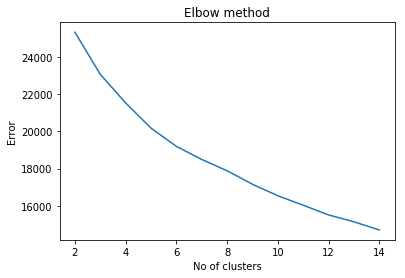

In [44]:
Error =[]
for i in range(2, 15):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9
10
11
12
13
14


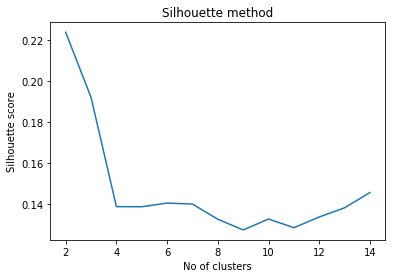

In [45]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,15):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 15), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [47]:
kmeansk = KMeans(n_clusters=6)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[5 5 3 ... 1 1 1]


array([[8.71487078e-02, 1.26438990e-01, 6.81191284e-01, 6.80772431e-02,
        3.00542561e-02, 2.81736926e-04, 9.08762252e-01, 0.00000000e+00,
        0.00000000e+00, 2.48089152e-04, 5.43766848e-02, 8.11154326e-01,
        9.46099360e-02, 1.83710120e-01, 1.13472999e-01, 2.46877516e-01,
        1.89165322e-01, 2.42551532e-01, 8.64588360e-02, 2.97483479e-01,
        3.83415581e-01, 1.82828739e-01, 7.89901499e-03, 1.96665946e-02,
        8.12543417e-01, 4.38830821e-02, 1.65730199e-01, 1.80074368e-01,
        2.07390985e-02],
       [3.51952517e-02, 1.92757080e-01, 6.40064504e-01, 4.98375890e-02,
        2.49544722e-02, 5.18848440e-05, 9.21556082e-01, 0.00000000e+00,
        0.00000000e+00, 8.96865367e-05, 6.81760911e-02, 7.22840192e-01,
        1.99712049e-01, 1.74230988e-01, 2.57009192e-01, 3.04119399e-01,
        1.41816855e-01, 1.16666524e-01, 5.44126823e-03, 5.13724788e-02,
        1.32554635e-01, 8.00953133e-01, 3.83590677e-03, 6.44513064e-04,
        7.45175252e-01, 9.77760124e-02,

In [48]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[0.1, 0.1, 0.7, 0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0.1, 0.8, 0.1,
        0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.3, 0.4, 0.2, 0. , 0. , 0.8, 0. ,
        0.2, 0.2, 0. ],
       [0. , 0.2, 0.6, 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0.1, 0.7, 0.2,
        0.2, 0.3, 0.3, 0.1, 0.1, 0. , 0.1, 0.1, 0.8, 0. , 0. , 0.7, 0.1,
        0.2, 0.2, 0. ],
       [0.1, 0. , 0.5, 0.1, 0.1, 0. , 0.9, 0. , 0. , 0. , 0.4, 0.1, 0.5,
        0.4, 0.2, 0.2, 0.1, 0.1, 0.2, 0.6, 0. , 0.1, 0. , 0.1, 1. , 0. ,
        0.2, 0.2, 0. ],
       [0. , 0.2, 0.6, 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0.1, 0.3, 0.5,
        0.1, 0.1, 0.3, 0.2, 0.3, 0. , 0.1, 0.2, 0.7, 0. , 0. , 0.7, 0.1,
        0.2, 0.2, 0. ],
       [0.1, 0. , 0.5, 0.1, 0.1, 0. , 0.9, 0. , 0. , 0. , 0.4, 0.2, 0.2,
        0.1, 0.1, 0.2, 0.2, 0.3, 0.5, 0.2, 0.1, 0.1, 0. , 0.1, 1. , 0.1,
        0.2, 0.2, 0. ],
       [0.1, 0.1, 0.6, 0.1, 0.1, 0. , 0.9, 0. , 0. , 0. , 0.3, 0.4, 0.3,
        0.4, 0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.2, 0.5, 0. , 0. , 0.9, 0.2,
    

In [49]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({5: 10486, 3: 7604, 4: 7386, 0: 3216, 1: 7824, 2: 6367})

In [57]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df00.columns
result

,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,0.087,0.126,0.681,0.068,0.030,0.000,0.909,0.0,0.0,0.000,0.054,0.811,0.095,0.184,0.113,0.247,0.189,0.243,0.086,0.297,0.383,0.183,0.008,0.020,0.813,0.044,0.166,0.180,0.021
1,0.035,0.193,0.640,0.050,0.025,0.000,0.922,0.0,0.0,0.000,0.068,0.723,0.200,0.174,0.257,0.304,0.142,0.117,0.005,0.051,0.133,0.801,0.004,0.001,0.745,0.098,0.159,0.193,0.026
2,0.110,0.037,0.526,0.071,0.078,0.001,0.897,0.0,0.0,0.001,0.357,0.117,0.502,0.391,0.205,0.208,0.058,0.122,0.190,0.605,0.028,0.091,0.001,0.070,0.956,0.050,0.172,0.154,0.012
3,0.031,0.214,0.598,0.047,0.013,0.000,0.929,0.0,0.0,0.000,0.131,0.327,0.514,0.065,0.140,0.287,0.208,0.285,0.009,0.064,0.239,0.660,0.016,0.001,0.679,0.108,0.157,0.221,0.026
4,0.131,0.034,0.496,0.092,0.074,0.001,0.898,0.0,0.0,0.001,0.441,0.213,0.233,0.104,0.076,0.227,0.181,0.334,0.526,0.156,0.051,0.069,0.004,0.118,0.957,0.068,0.169,0.156,0.011
5,0.076,0.099,0.606,0.066,0.063,0.001,0.902,0.0,0.0,0.001,0.264,0.369,0.343,0.428,0.191,0.172,0.084,0.106,0.085,0.225,0.191,0.450,0.003,0.028,0.870,0.199,0.168,0.164,0.024


In [58]:
result['counter'] = [3216,7824,6367,7604,7386,10486]

In [59]:
result.to_csv('02clustering_result00.csv')

In [60]:
df00['cluster'] = y_kmeansk

In [61]:
df00.head()

,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,cluster
62385,18514.455038,71941.865655,0.547492,17.783315,184.981481,18513001.0,0.178773,0.0,0.0,950,0.265263,0.442105,0.240000,0.212632,0.188421,0.266316,0.132632,0.171579,0.072632,0.144211,0.255789,0.452632,0.005263,0.041053,80.994737,37,-0.057051,0.253384,-0.198056,5
62386,24465.416667,51013.315217,0.527414,18.768116,515.596364,6998626.0,0.149233,0.0,0.0,278,0.187050,0.316547,0.482014,0.363309,0.237410,0.226619,0.046763,0.118705,0.273381,0.287770,0.082734,0.316547,0.003597,0.028777,83.082734,19,-0.075295,0.104691,-0.068384,5
62387,5197.125000,127755.925000,0.587978,13.050000,106.375000,327880.0,0.405346,0.0,0.0,40,0.200000,0.325000,0.475000,0.075000,0.150000,0.250000,0.250000,0.275000,0.000000,0.000000,0.275000,0.725000,0.000000,0.000000,74.775000,18,0.103410,1.086290,-0.547545,3
62388,22732.666667,39006.111111,0.531133,16.888889,275.222222,228950.0,0.075781,0.0,0.0,9,0.111111,0.000000,0.888889,0.555556,0.222222,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.777778,0.000000,0.000000,84.000000,1,0.034243,0.119046,-0.482474,5
62389,134395.843137,13733.450980,0.413171,16.549020,20.872340,5041411.0,0.113621,0.0,0.0,92,0.054348,0.347826,0.086957,0.000000,0.010870,0.010870,0.032609,0.500000,0.043478,0.141304,0.152174,0.173913,0.043478,0.000000,84.782609,7,-0.076402,-0.006974,-0.580948,4


In [64]:
df00.to_csv('02clustering_data00.csv')

In [63]:
pd.set_option('display.max_columns', None)
app0 = df00[df00.cluster == 0].describe().iloc[0:2,:]
app0 = app0.append(df00[df00.cluster == 1].describe().iloc[1,:])
app0 = app0.append(df00[df00.cluster == 2].describe().iloc[1,:])
app0 = app0.append(df00[df00.cluster == 3].describe().iloc[1,:])
app0 = app0.append(df00[df00.cluster == 4].describe().iloc[1,:])
app0 = app0.append(df00[df00.cluster == 5].describe().iloc[1,:])
app0 = app0.iloc[1:,:]
app0

,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,cluster
mean,20573.111860,71589.773310,0.636794,21.129808,175.041384,1.224915e+06,0.221783,0.0,0.0,58.998445,0.054331,0.811158,0.094639,0.183581,0.113384,0.246954,0.189224,0.242627,0.086486,0.297514,0.383410,0.182761,0.005926,0.019673,80.375532,3.809080,-0.044944,0.313629,-0.222238,0.0
mean,8705.696327,109002.344410,0.602949,16.005768,145.711954,2.256820e+05,0.323789,0.0,0.0,21.956161,0.068172,0.722977,0.199576,0.174282,0.257104,0.304106,0.141704,0.116645,0.005441,0.051388,0.132590,0.800900,0.002877,0.000645,77.996816,7.257285,-0.080657,0.403135,-0.042207,1.0
mean,25810.783582,20850.130064,0.508640,22.036329,455.526553,4.817132e+06,0.128122,0.0,0.0,213.466782,0.356843,0.117022,0.501670,0.391164,0.205155,0.208040,0.058186,0.122141,0.189830,0.605321,0.028054,0.090796,0.000383,0.070303,85.462716,4.184702,-0.010575,0.134279,-0.567099,2.0
mean,7798.579078,120951.692756,0.568500,15.299692,76.088651,2.348978e+05,0.379975,0.0,0.0,26.192267,0.130682,0.327057,0.513754,0.064917,0.140056,0.286732,0.207878,0.284658,0.009307,0.063984,0.238514,0.659958,0.011655,0.000823,75.658012,7.936218,-0.095551,0.597527,-0.036992,3.0
mean,30661.539929,19187.831544,0.483945,27.738136,428.741740,3.680141e+06,0.133503,0.0,0.0,175.527620,0.440943,0.213139,0.233310,0.103816,0.076381,0.227045,0.181040,0.333774,0.525875,0.155613,0.050858,0.069329,0.002776,0.117607,85.473330,5.377200,-0.025772,0.148707,-0.578845,4.0
mean,18021.519769,56144.010165,0.574719,20.447673,365.120187,6.241991e+06,0.166595,0.0,0.0,301.442876,0.264118,0.369469,0.342742,0.428276,0.191224,0.172129,0.084001,0.106365,0.085145,0.224897,0.191148,0.450458,0.002267,0.028078,82.396497,13.727923,-0.032659,0.201815,-0.096987,5.0


In [66]:
app0.to_csv('02clustering_mean00.csv')

## Separate Approach - with CA

In [67]:
df01 = df[df.isca == 1].dropna()

In [68]:
df01.head()

,isca,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,1,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830
1,1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242,0.202479,0.392562,0.376033,0.123967,0.152893,0.177686,0.409091,0.107438,0.433884,0.177686,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682
2,1,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331,0.057402,0.664653,0.160121,0.027190,0.018127,0.178248,0.274924,0.413897,0.015106,0.326284,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768
3,1,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71,0.042254,0.492958,0.450704,0.154930,0.084507,0.352113,0.169014,0.239437,0.000000,0.056338,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589
4,1,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964


In [69]:
df01.shape

(59231, 30)

In [70]:
df01 = df01.drop('isca',axis=1)

In [71]:
x = df01.values

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
x = mm_scaler.fit_transform(df01)
mm_scaler.transform(x)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[-0.0026562 , -0.00280009,  0.74473389, ...,  0.3793219 ,
         0.13589955,  0.01316894],
       [-0.00265584, -0.00280028,  0.57123236, ...,  0.35500171,
         0.12865417,  0.01325636],
       [-0.00265532, -0.00280031,  0.77849237, ...,  0.34408311,
         0.12798684,  0.01326945],
       ...,
       [-0.00265608, -0.00280026,  0.69782872, ...,  0.36302412,
         0.12999537,  0.01324683],
       [-0.00265601, -0.00280008,  0.41098807, ...,  0.34263789,
         0.12887187,  0.01321015],
       [-0.00265622, -0.00279994,  0.70941327, ...,  0.32894007,
         0.127053  ,  0.01342284]])

2
3
4
5
6
7
8
9
10
11
12
13
14


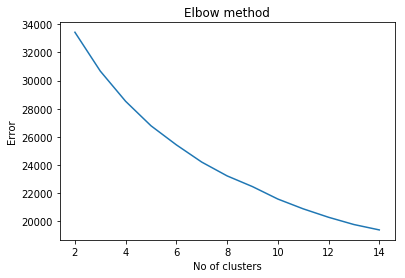

In [72]:
Error =[]
for i in range(2, 15):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(range(2, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

2
3
4
5
6
7
8
9
10
11
12
13
14


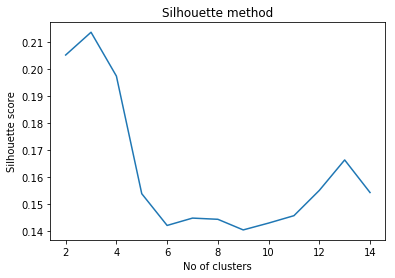

In [73]:
from sklearn.metrics import silhouette_score
Silhouette = []
for i in range(2,15):
    print(i)
    clusterer = KMeans(n_clusters = i)
    cluster_labels = clusterer.fit_predict(x)
    sil = silhouette_score(x, cluster_labels)
    Silhouette.append(sil)
    
plt.plot(range(2, 15), Silhouette)
plt.title('Silhouette method')
plt.xlabel('No of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [74]:
kmeansk = KMeans(n_clusters=3)
y_kmeansk = kmeansk.fit_predict(x)
print(y_kmeansk)

kmeansk.cluster_centers_

[1 0 1 ... 0 1 1]


array([[9.95936467e-02, 7.09379980e-02, 5.76900514e-01, 7.67686948e-02,
        6.53121994e-02, 7.22113653e-03, 9.45522147e-01, 2.15114696e-04,
        6.07530971e-03, 7.35632913e-03, 3.19380548e-01, 3.01833391e-01,
        3.18083955e-01, 3.09993260e-01, 1.52442488e-01, 1.94918752e-01,
        1.08143406e-01, 1.90947545e-01, 2.10038573e-01, 2.99738074e-01,
        1.41775325e-01, 2.22594995e-01, 4.18557640e-03, 7.97870210e-02,
        9.32496671e-01, 2.46076157e-01, 2.65708456e-01, 1.33796719e-01,
        9.64017002e-03],
       [3.35436124e-02, 2.16180082e-01, 6.43137751e-01, 5.37505166e-02,
        2.42188281e-02, 4.44775469e-04, 9.57873952e-01, 1.56855843e-04,
        1.73940208e-02, 7.44038432e-04, 1.03228902e-01, 5.48292761e-01,
        3.28465087e-01, 1.69643245e-01, 1.98261226e-01, 2.90622135e-01,
        1.60465483e-01, 1.66743238e-01, 6.84521711e-03, 6.72957049e-02,
        2.09726522e-01, 6.95417875e-01, 9.50345496e-03, 7.47019717e-04,
        7.93791796e-01, 1.33153146e-01,

In [75]:
np.around(kmeansk.cluster_centers_, decimals=1)

array([[0.1, 0.1, 0.6, 0.1, 0.1, 0. , 0.9, 0. , 0. , 0. , 0.3, 0.3, 0.3,
        0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.1, 0.2, 0. , 0.1, 0.9, 0.2,
        0.3, 0.1, 0. ],
       [0. , 0.2, 0.6, 0.1, 0. , 0. , 1. , 0. , 0. , 0. , 0.1, 0.5, 0.3,
        0.2, 0.2, 0.3, 0.2, 0.2, 0. , 0.1, 0.2, 0.7, 0. , 0. , 0.8, 0.1,
        0.2, 0.2, 0. ],
       [0. , 0.2, 0.6, 0.1, 0. , 0. , 1. , 0. , 0.9, 0. , 0.1, 0.5, 0.3,
        0.2, 0.2, 0.3, 0.1, 0.2, 0. , 0.1, 0.2, 0.6, 0. , 0. , 0.8, 0.1,
        0.2, 0.2, 0. ]])

In [76]:
import collections, numpy
collections.Counter(y_kmeansk)

Counter({1: 26254, 0: 28152, 2: 4825})

In [77]:
result = pd.DataFrame(np.around(kmeansk.cluster_centers_,decimals=3))
result.columns = df01.columns
result

,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif
0,0.100,0.071,0.577,0.077,0.065,0.007,0.946,0.000,0.006,0.007,0.319,0.302,0.318,0.310,0.152,0.195,0.108,0.191,0.210,0.300,0.142,0.223,0.004,0.080,0.932,0.246,0.266,0.134,0.010
1,0.034,0.216,0.643,0.054,0.024,0.000,0.958,0.000,0.017,0.001,0.103,0.548,0.328,0.170,0.198,0.291,0.160,0.167,0.007,0.067,0.210,0.695,0.010,0.001,0.794,0.133,0.240,0.166,0.013
2,0.044,0.195,0.626,0.058,0.031,0.000,0.953,0.002,0.855,0.000,0.146,0.509,0.321,0.219,0.192,0.269,0.145,0.155,0.017,0.115,0.206,0.636,0.009,0.001,0.815,0.103,0.245,0.157,0.014


In [78]:
result['counter'] = [28152,26254,4825]

In [79]:
result.to_csv('02clustering_result01.csv')

In [81]:
df01['cluster'] = y_kmeansk

In [82]:
df01.head()

,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,cluster
0,10433.666667,84630.000000,0.624331,18.333333,234.333333,4.805000e+04,0.211238,0.0,0.0,3,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667,0.000000,0.000000,80.666667,3,0.210824,0.535095,-0.771830,1
1,29009.302128,33553.957447,0.503281,18.408511,282.646809,6.464402e+06,0.086799,0.0,0.0,242,0.202479,0.392562,0.376033,0.123967,0.152893,0.177686,0.409091,0.107438,0.433884,0.177686,0.053719,0.235537,0.000000,0.070248,84.619835,15,-0.069515,0.069385,-0.264682,0
2,56054.082781,26070.062914,0.647884,21.076159,42.979933,9.735923e+06,0.130765,0.0,0.0,331,0.057402,0.664653,0.160121,0.027190,0.018127,0.178248,0.274924,0.413897,0.015106,0.326284,0.129909,0.410876,0.009063,0.021148,83.752266,21,-0.195374,0.026491,-0.188768,1
3,4206.478873,128543.450704,0.595144,13.915493,101.171429,3.561250e+05,0.322148,0.0,0.0,71,0.042254,0.492958,0.450704,0.154930,0.084507,0.352113,0.169014,0.239437,0.000000,0.056338,0.239437,0.690141,0.014085,0.000000,75.422535,25,-0.168295,0.597379,0.036589,1
4,9144.500000,88761.500000,0.594674,13.500000,199.000000,1.940000e+04,0.072165,0.0,0.0,2,0.500000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,78.500000,2,-0.032205,1.121494,0.143964,0


In [83]:
df01.to_csv('02clustering_data01.csv')

In [85]:
pd.set_option('display.max_columns', None)
app0 = df01[df01.cluster == 0].describe().iloc[0:2,:]
app0 = app0.append(df01[df01.cluster == 1].describe().iloc[1,:])
app0 = app0.append(df01[df01.cluster == 2].describe().iloc[1,:])
app0 = app0.iloc[1:,:]
app0

,AvgPrice,avgmiles,Salesefficiency,AvgDaysToSell,inventory,revenue,profitability,NGC_total_floored,wallet_share,count_vin,Velocity_Cold,Velocity_Hot,Velocity_Warm,vol_tier_Tier1,vol_tier_Tier2,vol_tier_Tier3,vol_tier_Tier4,vol_tier_Tier5,availability_Excessive,availability_High,availability_Low,availability_Medium,availability_No Inventory,availability_Other,avg_year,make_count,Wholesale_dif,Retail_dif,Avg_mileage_dif,cluster
mean,23366.236574,37990.861679,0.538928,22.649335,379.632836,1.060447e+07,0.145933,17186.358027,0.006076,521.708404,0.319405,0.301822,0.318066,0.309999,0.152448,0.194925,0.108109,0.190960,0.210053,0.299752,0.141744,0.222585,0.002511,0.079795,83.822509,16.256607,-0.044737,0.163244,-0.265809,0.0
mean,8272.042815,112834.033881,0.594277,16.157784,141.404449,6.541190e+05,0.339568,12529.062295,0.017392,53.695742,0.103227,0.548277,0.328484,0.169653,0.198250,0.290604,0.160496,0.166732,0.006853,0.067307,0.209752,0.695374,0.005702,0.000747,77.292098,9.256418,-0.132508,0.421725,0.022581,1.0
mean,10582.107105,101776.119634,0.579983,17.353193,181.538842,2.639408e+05,0.265775,177802.313480,0.855285,22.631088,0.145850,0.509239,0.321260,0.219463,0.192297,0.269289,0.144627,0.155242,0.017265,0.114996,0.206190,0.635767,0.005472,0.001216,78.274403,7.382383,-0.116115,0.352585,0.029635,2.0


In [86]:
app0.to_csv('02clustering_mean01.csv')